In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv("csv/82000278_Toamnei_CO2_2021_7.csv")

In [3]:
dataframe.head()

,time,latitude,longitude,altitude,co2
0,1625086823,45.651464,25.615426,100,553
1,1625086883,45.651464,25.615426,100,551
2,1625086943,45.651464,25.615426,100,551
3,1625087003,45.651464,25.615426,100,558
4,1625087063,45.651464,25.615426,100,559


In [4]:
dataframe_size = len(dataframe.index)
dataframe_size

44612

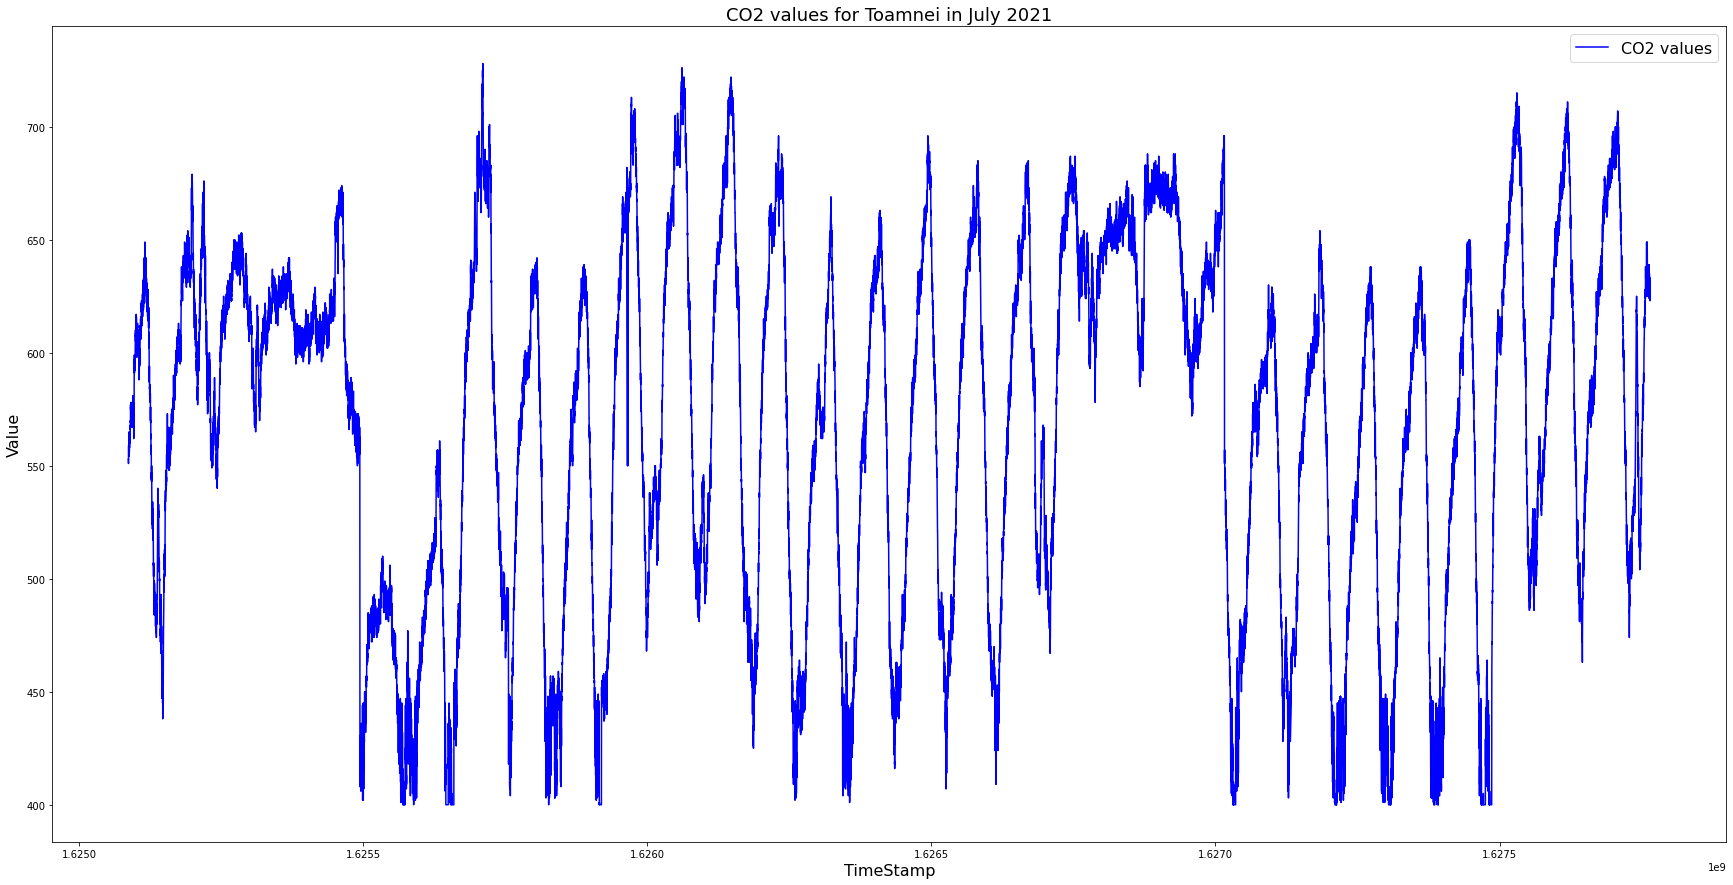

In [5]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(dataframe.get('time'), dataframe.get('co2'), label="CO2 values", color = "blue")
# plt.scatter(dataframe.get('_source.TimeStamp'), dataframe.get('_source.Value'), color = "red")
plt.xlabel("TimeStamp", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("CO2 values for Toamnei in July 2021", fontsize=18)
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CO2_Toamnei_2021-07.jpg', bbox_inches = 'tight')
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [7]:
X = dataframe[["time"]].values
y = dataframe[["co2"]].values

In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

In [10]:
print("Slope: ", float(regressor.coef_))
print("Intercept: ", float(regressor.intercept_))

Slope:  2.0054755176838107e-06
Intercept:  -2693.1836159749487


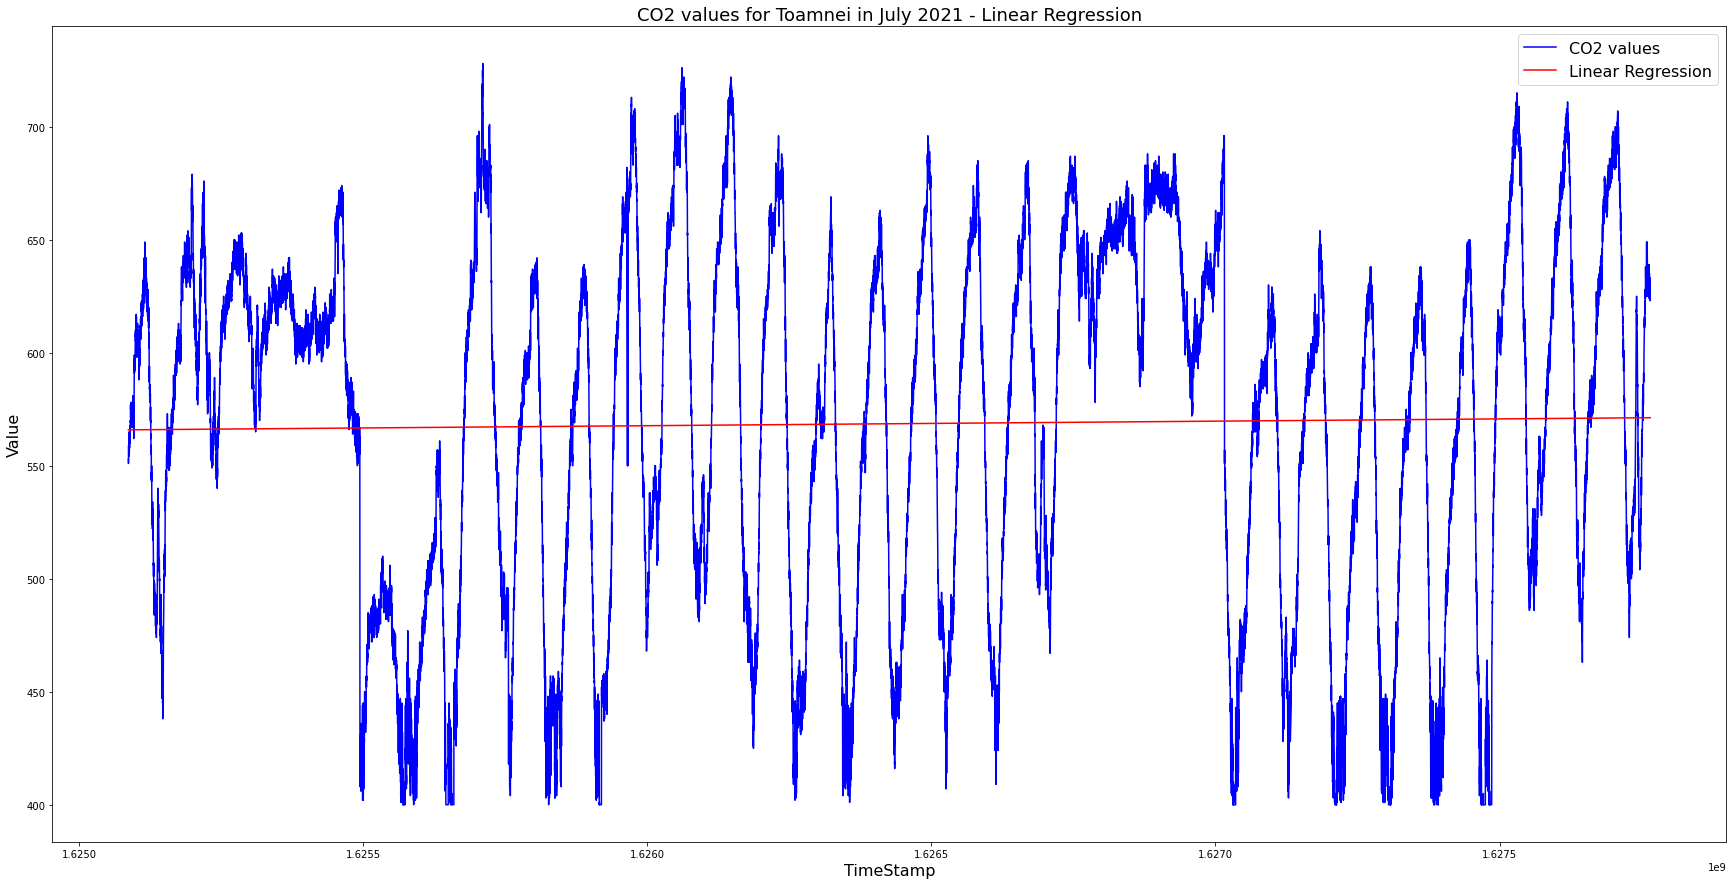

In [11]:
plt.figure(figsize=(30,15))
# plt.scatter(X, y, color = 'blue')
plt.plot(X,y, color = 'blue', label="CO2 values")
plt.plot(X, regressor.predict(X), color = 'red', label="Linear Regression")
plt.title('CO2 values for Toamnei in July 2021 - Linear Regression', fontsize=18)
plt.xlabel('TimeStamp', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CO2_Toamnei_2021-07_Linear.jpg', bbox_inches = 'tight')
plt.show()

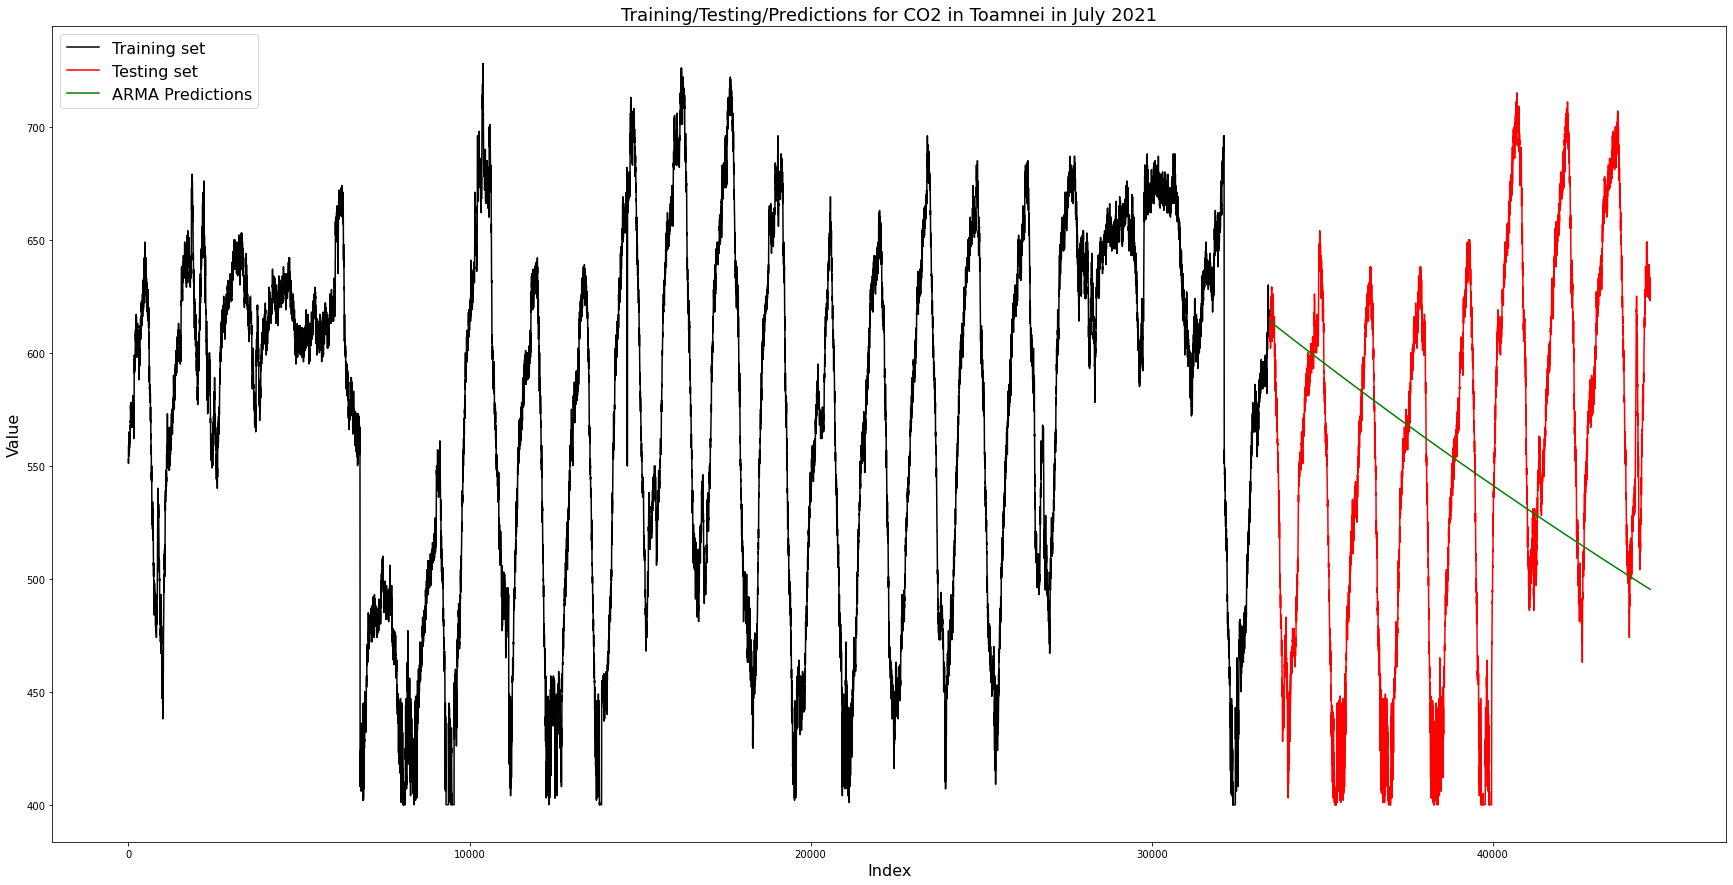

RMSE:  101.29694795766392


In [12]:
train = dataframe[dataframe.index < dataframe_size*(3/4)]
test = dataframe[dataframe.index >= dataframe_size*(3/4)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
y = train['co2']

ARMAmodel = SARIMAX(y, order=(1,0,1))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('co2'), color = "black", label = "Training set")
plt.plot(test.index, test.get('co2'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("Training/Testing/Predictions for CO2 in Toamnei in July 2021", fontsize=18)
plt.plot(y_pred_out, color='green', label = 'ARMA Predictions')
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CO2_Toamnei_2021-07_ARMA.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["co2"].values, y_pred_df["Predictions"]))
print("RMSE: ", arma_rmse)

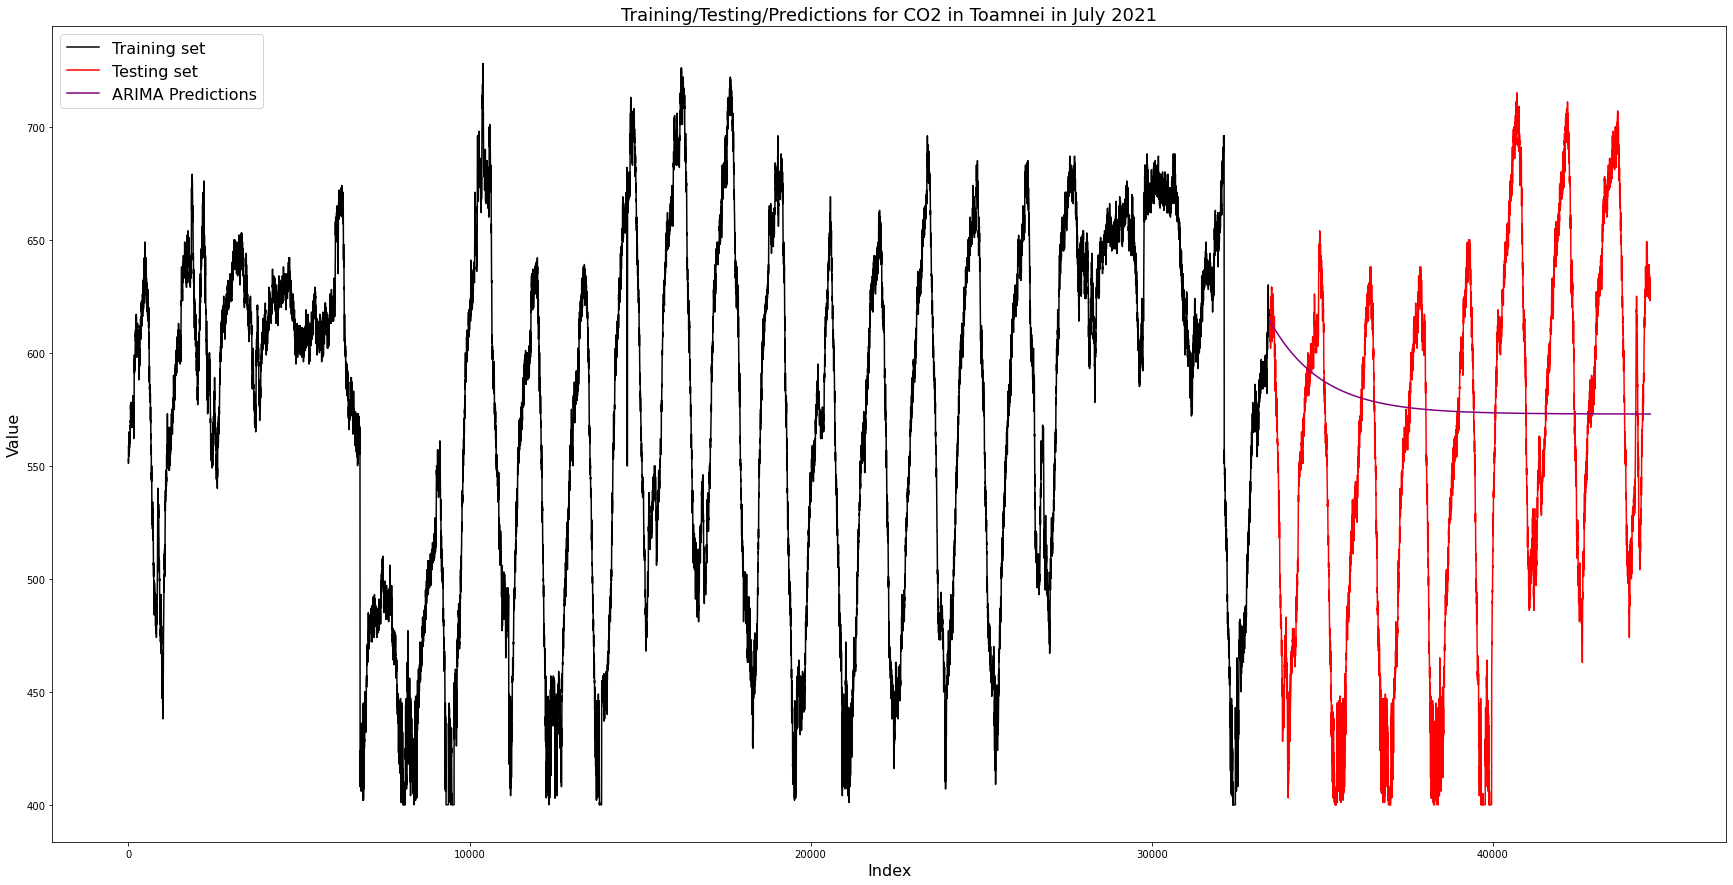

RMSE:  88.45891166474065


In [13]:
train = dataframe[dataframe.index < dataframe_size*(3/4)]
test = dataframe[dataframe.index >= dataframe_size*(3/4)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
y = train['co2']

ARMAmodel = ARIMA(y, order=(2,0,2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('co2'), color = "black", label = "Training set")
plt.plot(test.index, test.get('co2'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("Training/Testing/Predictions for CO2 in Toamnei in July 2021", fontsize=18)
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions')
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CO2_Toamnei_2021-07_ARIMA.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse1 = np.sqrt(mean_squared_error(test["co2"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse1)

C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


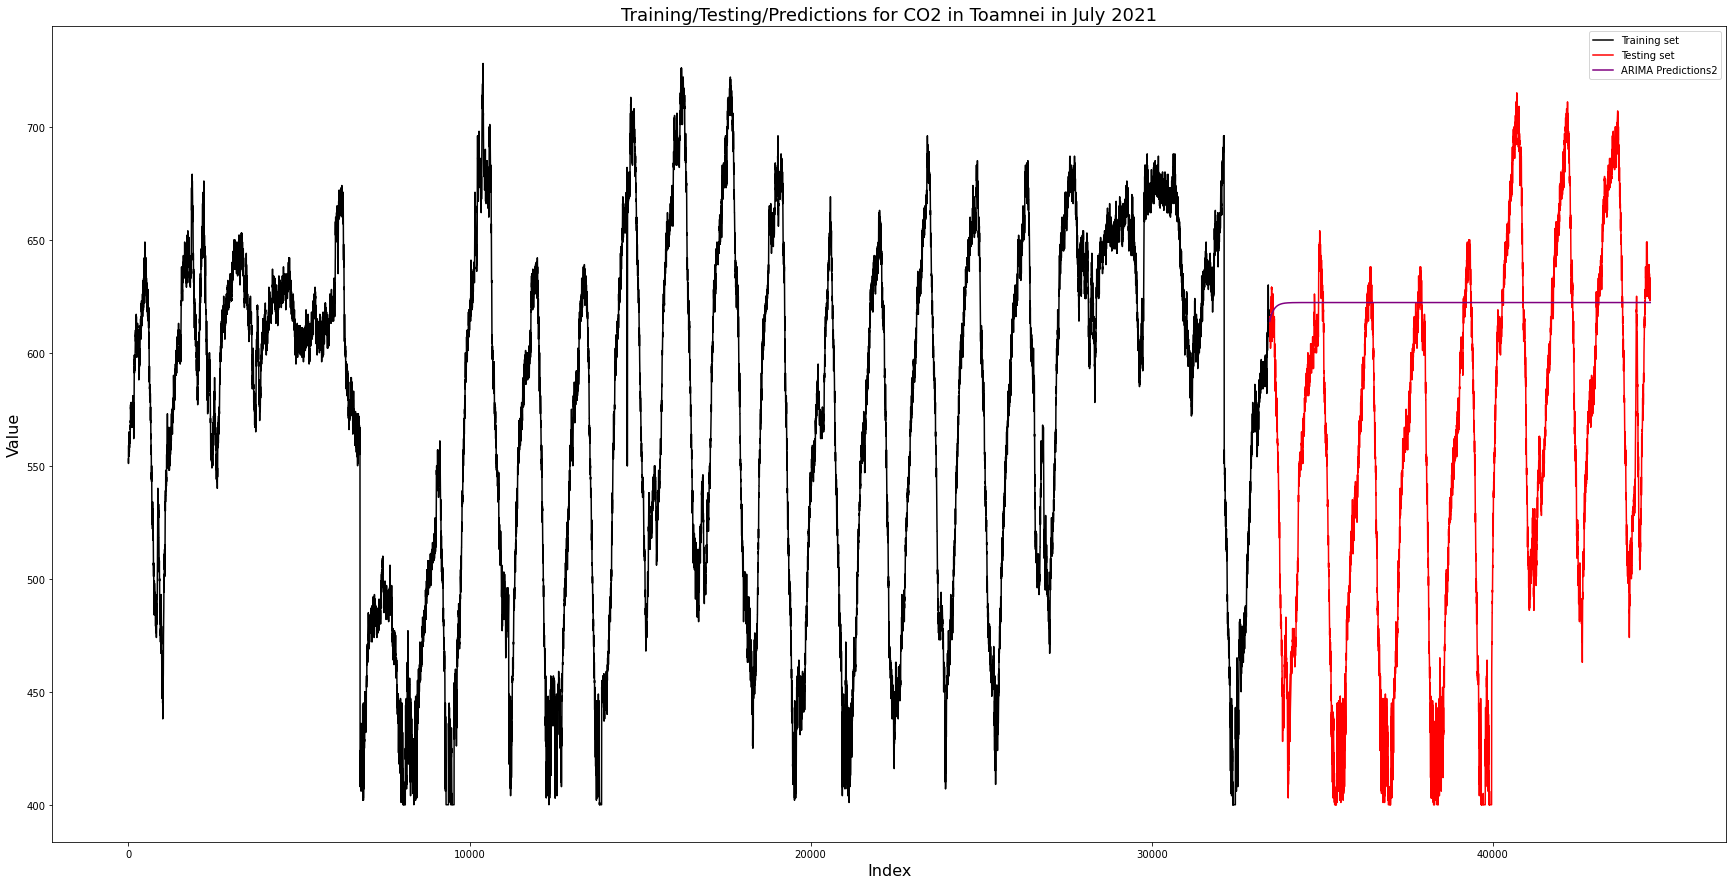

RMSE:  106.50817042119675


In [14]:
train = dataframe[dataframe.index < dataframe_size*(3/4)]
test = dataframe[dataframe.index >= dataframe_size*(3/4)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
y = train['co2']

ARMAmodel = ARIMA(y, order=(31,1,4))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('co2'), color = "black", label = "Training set")
plt.plot(test.index, test.get('co2'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("Training/Testing/Predictions for CO2 in Toamnei in July 2021", fontsize=18)
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions2')
plt.legend()
plt.savefig('plots_from_csv/CO2_Toamnei_2021-07_ARIMA_v2.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse2 = np.sqrt(mean_squared_error(test["co2"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse2)

C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


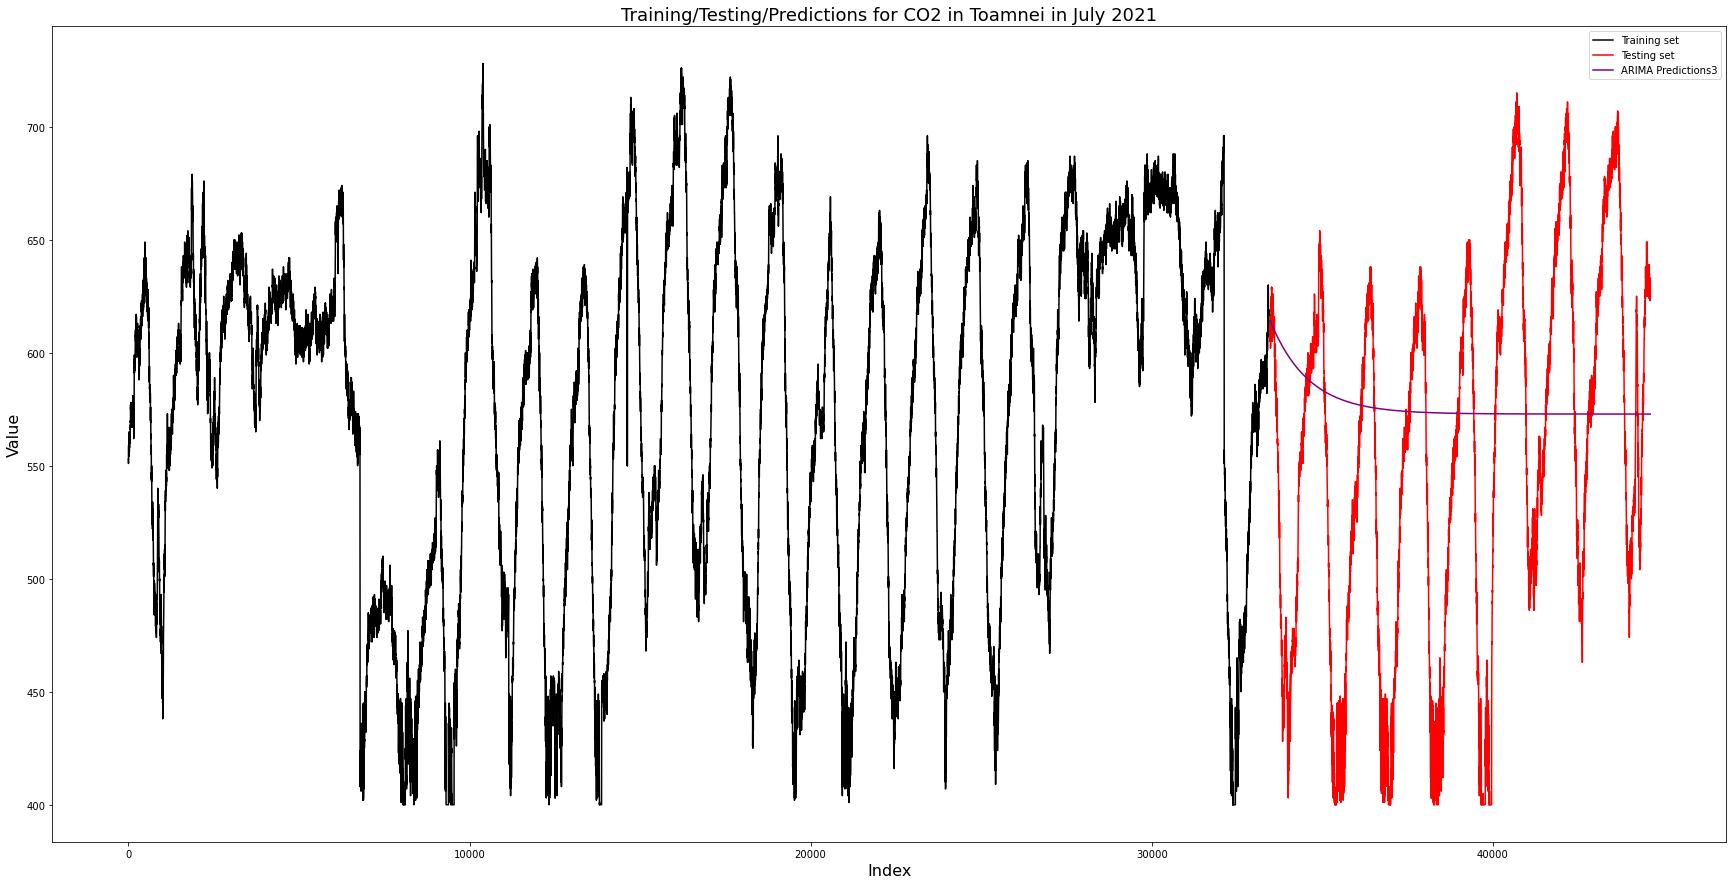

RMSE:  87.53566775795483


In [15]:
train = dataframe[dataframe.index < dataframe_size*(3/4)]
test = dataframe[dataframe.index >= dataframe_size*(3/4)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
y = train['co2']

ARMAmodel = ARIMA(y, order=(31,0,2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('co2'), color = "black", label = "Training set")
plt.plot(test.index, test.get('co2'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("Training/Testing/Predictions for CO2 in Toamnei in July 2021", fontsize=18)
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions3')
plt.legend()
plt.savefig('plots_from_csv/CO2_Toamnei_2021-07_ARIMA_v3.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse2 = np.sqrt(mean_squared_error(test["co2"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse2)